# Redes Neuronales Básicas

Este notebook cubre los conceptos fundamentales de redes neuronales artificiales, desde el perceptrón hasta redes multicapa.

## Introducción

Las redes neuronales son modelos computacionales inspirados en el cerebro biológico que pueden aprender patrones complejos en los datos.

### Componentes Principales

- **Neuronas (Nodos)**: Unidades de procesamiento básicas
- **Pesos**: Parámetros que se ajustan durante el entrenamiento
- **Bias**: Término de sesgo que permite ajustar la activación
- **Función de activación**: Transforma la entrada en salida
- **Capas**: Organización de neuronas en niveles


## Importar Librerías


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Configuración
np.random.seed(42)
plt.style.use('seaborn-v0_8' if 'seaborn-v0_8' in plt.style.available else 'seaborn')


## 1. Perceptrón Multicapa (MLP) desde Cero

Implementaremos una red neuronal multicapa básica para entender los conceptos fundamentales.


In [2]:
class MLP:
    """Perceptrón Multicapa básico"""
    
    def __init__(self, layers, learning_rate=0.01):
        """
        layers: lista con número de neuronas por capa [input, hidden1, hidden2, ..., output]
        learning_rate: tasa de aprendizaje
        """
        self.layers = layers
        self.learning_rate = learning_rate
        self.weights = []
        self.biases = []
        
        # Inicializar pesos y biases
        for i in range(len(layers) - 1):
            # Inicialización Xavier
            w = np.random.randn(layers[i], layers[i+1]) * np.sqrt(2.0 / layers[i])
            b = np.zeros((1, layers[i+1]))
            self.weights.append(w)
            self.biases.append(b)
    
    def sigmoid(self, x):
        """Función de activación sigmoide"""
        return 1 / (1 + np.exp(-np.clip(x, -250, 250)))
    
    def sigmoid_derivative(self, x):
        """Derivada de la sigmoide"""
        s = self.sigmoid(x)
        return s * (1 - s)
    
    def relu(self, x):
        """Función de activación ReLU"""
        return np.maximum(0, x)
    
    def relu_derivative(self, x):
        """Derivada de ReLU"""
        return (x > 0).astype(float)
    
    def forward(self, X):
        """Propagación hacia adelante"""
        self.activations = [X]
        self.z_values = []
        
        for i in range(len(self.weights)):
            z = np.dot(self.activations[-1], self.weights[i]) + self.biases[i]
            self.z_values.append(z)
            
            # ReLU para capas ocultas, sigmoide para salida
            if i < len(self.weights) - 1:
                a = self.relu(z)
            else:
                a = self.sigmoid(z)
            self.activations.append(a)
        
        return self.activations[-1]
    
    def backward(self, X, y, output):
        """Propagación hacia atrás (backpropagation)"""
        m = X.shape[0]
        
        # Error en la capa de salida
        output_error = output - y
        
        # Gradientes
        dW = []
        dB = []
        
        # Gradiente de la capa de salida
        delta = output_error * self.sigmoid_derivative(self.z_values[-1])
        dW.insert(0, np.dot(self.activations[-2].T, delta) / m)
        dB.insert(0, np.sum(delta, axis=0, keepdims=True) / m)
        
        # Propagación hacia atrás
        for i in range(len(self.weights) - 2, -1, -1):
            delta = np.dot(delta, self.weights[i+1].T) * self.relu_derivative(self.z_values[i])
            dW.insert(0, np.dot(self.activations[i].T, delta) / m)
            dB.insert(0, np.sum(delta, axis=0, keepdims=True) / m)
        
        # Actualizar pesos y biases
        for i in range(len(self.weights)):
            self.weights[i] -= self.learning_rate * dW[i]
            self.biases[i] -= self.learning_rate * dB[i]
    
    def train(self, X, y, epochs=1000, verbose=True):
        """Entrenar la red"""
        losses = []
        
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)
            
            # Calcular pérdida (MSE)
            loss = np.mean((output - y) ** 2)
            losses.append(loss)
            
            # Backward pass
            self.backward(X, y, output)
            
            if verbose and (epoch + 1) % (epochs // 10) == 0:
                print(f"Época {epoch+1}/{epochs}, Pérdida: {loss:.4f}")
        
        return losses
    
    def predict(self, X):
        """Realizar predicciones"""
        output = self.forward(X)
        return (output > 0.5).astype(int)

print("Clase MLP creada exitosamente")


Clase MLP creada exitosamente


## 2. Ejemplo Práctico: Clasificación Binaria


Época 100/1000, Pérdida: 0.2555
Época 200/1000, Pérdida: 0.2505
Época 300/1000, Pérdida: 0.2467
Época 400/1000, Pérdida: 0.2396
Época 500/1000, Pérdida: 0.2246
Época 600/1000, Pérdida: 0.1954
Época 700/1000, Pérdida: 0.1548
Época 800/1000, Pérdida: 0.1293
Época 900/1000, Pérdida: 0.1171
Época 1000/1000, Pérdida: 0.1106

Precisión en entrenamiento: 0.8662
Precisión en prueba: 0.8650


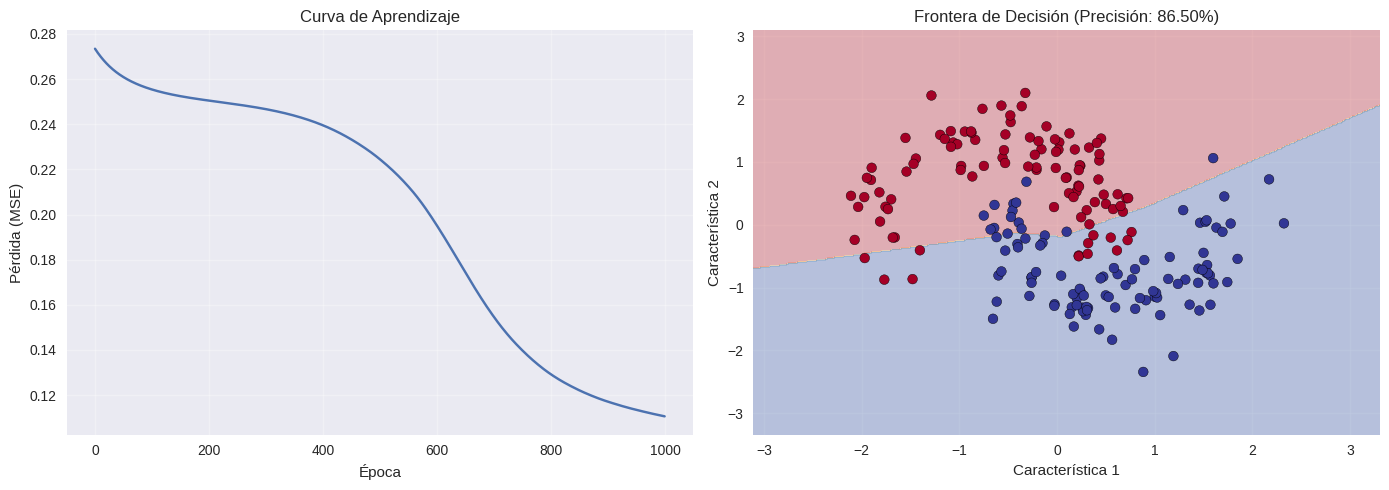

In [3]:
# Generar datos de ejemplo
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
y = y.reshape(-1, 1)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar la red
mlp = MLP(layers=[2, 4, 4, 1], learning_rate=0.1)
losses = mlp.train(X_train, y_train, epochs=1000, verbose=True)

# Predicciones
y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)

# Calcular precisión
train_acc = np.mean(y_pred_train == y_train)
test_acc = np.mean(y_pred_test == y_test)

print(f"\nPrecisión en entrenamiento: {train_acc:.4f}")
print(f"Precisión en prueba: {test_acc:.4f}")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Curva de pérdida
axes[0].plot(losses)
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Pérdida (MSE)')
axes[0].set_title('Curva de Aprendizaje')
axes[0].grid(True, alpha=0.3)

# Frontera de decisión
h = 0.02
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axes[1].contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
axes[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test.flatten(), cmap='RdYlBu', edgecolors='black')
axes[1].set_xlabel('Característica 1')
axes[1].set_ylabel('Característica 2')
axes[1].set_title(f'Frontera de Decisión (Precisión: {test_acc:.2%})')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


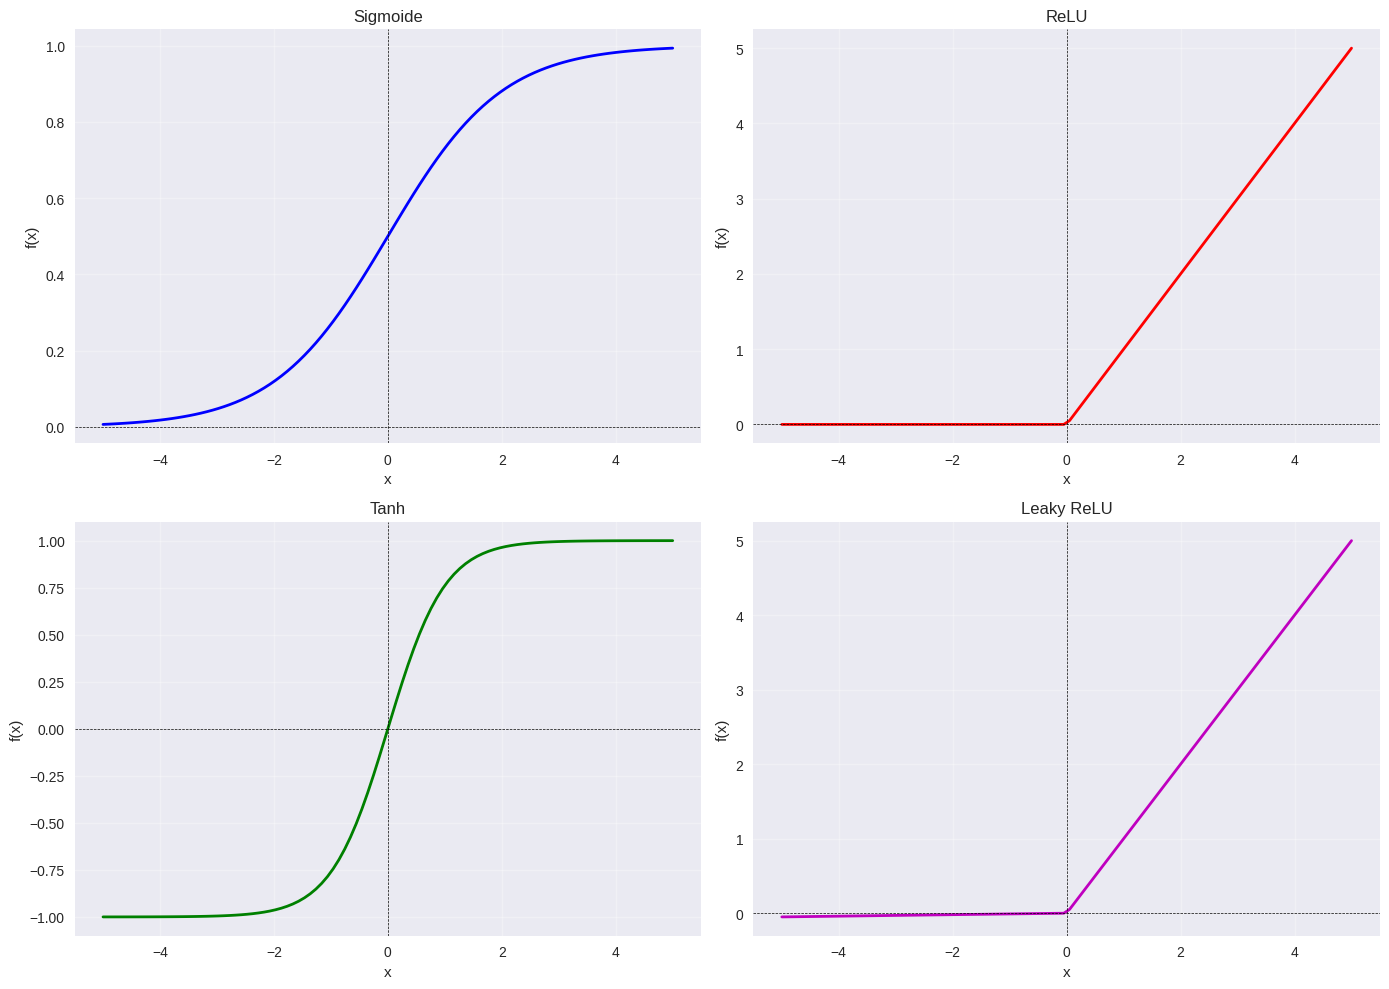

Funciones de activación comunes:
- Sigmoide: Rango [0, 1], útil para probabilidades
- ReLU: Rango [0, ∞), evita el problema del gradiente desaparecido
- Tanh: Rango [-1, 1], centrada en cero
- Leaky ReLU: Similar a ReLU pero permite pequeños valores negativos


In [4]:
# Definir funciones de activación
x = np.linspace(-5, 5, 100)

# Sigmoide
sigmoid = 1 / (1 + np.exp(-x))

# ReLU
relu = np.maximum(0, x)

# Tanh
tanh = np.tanh(x)

# Leaky ReLU
leaky_relu = np.where(x > 0, x, 0.01 * x)

# Visualización
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].plot(x, sigmoid, 'b-', linewidth=2)
axes[0, 0].set_title('Sigmoide')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('f(x)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axhline(0, color='k', linestyle='--', linewidth=0.5)
axes[0, 0].axvline(0, color='k', linestyle='--', linewidth=0.5)

axes[0, 1].plot(x, relu, 'r-', linewidth=2)
axes[0, 1].set_title('ReLU')
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('f(x)')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axhline(0, color='k', linestyle='--', linewidth=0.5)
axes[0, 1].axvline(0, color='k', linestyle='--', linewidth=0.5)

axes[1, 0].plot(x, tanh, 'g-', linewidth=2)
axes[1, 0].set_title('Tanh')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('f(x)')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axhline(0, color='k', linestyle='--', linewidth=0.5)
axes[1, 0].axvline(0, color='k', linestyle='--', linewidth=0.5)

axes[1, 1].plot(x, leaky_relu, 'm-', linewidth=2)
axes[1, 1].set_title('Leaky ReLU')
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('f(x)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axhline(0, color='k', linestyle='--', linewidth=0.5)
axes[1, 1].axvline(0, color='k', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

print("Funciones de activación comunes:")
print("- Sigmoide: Rango [0, 1], útil para probabilidades")
print("- ReLU: Rango [0, ∞), evita el problema del gradiente desaparecido")
print("- Tanh: Rango [-1, 1], centrada en cero")
print("- Leaky ReLU: Similar a ReLU pero permite pequeños valores negativos")


## 4. Resumen

### Conceptos Clave

- **Red Neuronal Multicapa (MLP)**: Red con múltiples capas de neuronas
- **Forward Propagation**: Cálculo de salidas desde entrada hasta salida
- **Backpropagation**: Algoritmo para ajustar pesos basado en el error
- **Función de Activación**: Introduce no-linealidad en el modelo
- **Learning Rate**: Controla la velocidad de aprendizaje

### Aplicaciones

- Clasificación de imágenes
- Reconocimiento de voz
- Procesamiento de lenguaje natural
- Sistemas de recomendación
- Análisis predictivo
